# Introduction

In many scientific and engineering applications, it is often necessary to optimize the parameters of a dynamical system to fit observed data. One common approach to parameter optimization is the Gaussian-Newton algorithm, which iteratively updates the parameters to minimize the difference between the predicted and observed measurements. In this project, we will explore the implementation of the Gaussian-Newton algorithm in Python to optimize the parameters of a dynamical system.

Let's consider a dynamic system described by the following ordinary diffrenetial equations:
$$\frac{{dx}}{{dt}} = ax + by$$
$$\frac{{dy}}{{dt}} = cx + dy$$
Where x,y represent the variables which describe the state of the system and a,b,c,d the parameters of the system
The system of differential equations corresponding to the matrix \( A \) can be expressed as:
$$
\frac{{d}}{{dt}} \begin{pmatrix} x \\ y \end{pmatrix} = A \begin{pmatrix} x \\ y \end{pmatrix}
$$

Given that $ A $ is a $ 2 \times 2 $ matrix:

$$A = \begin{pmatrix} a & b \\ c & d \end{pmatrix}$$

And the state vector is $\begin{pmatrix} x \\ y \end{pmatrix}$.

let $\dfrac{dX}{dt}=AX\\$ with $X= \begin{pmatrix} x \\ y \end{pmatrix}$, 

$$X(t)= \exp(At)X_0$$, with $X_o=\begin{pmatrix} x_{o}\\ y_{o} \end{pmatrix}$, $e^{At}$ is $ 2 \times 2 $ matrix

both $ X$ and $X_o$ is $ 2 \times 1 $ matrix.

Let's considering the new system define by
$$\begin{array}{l}
\dfrac{dX}{dt}\\
\dfrac{dZ_{X}}{dt}\\
\dfrac{dZ_{Y}}{dt}\end{array}$$ où $X=\begin{pmatrix}x\\y\end{pmatrix}$, $Z_{X}$ contient les dérivées de $x$ par raport à $a,b,c,d$ et 
$Z_{Y}$ contient les dérivées de $y$ par raport à $a,b,c,d$  


Si $X0$ est la condition initiale pour le systeme 2x2; la condition initiale pour le systeme 10x10 est 

Notons $\frac{dZ}{dt}=MZ(t)$, then $ Z(t)= \exp(Mt)Z_{o}$

 \begin{eqnarray*}
	Z(t)=\begin{pmatrix}
		X \\\
		Z_{X} \\\
		Z_{Y} \\
	\end{pmatrix}	
\end{eqnarray*}
 $Z_0=\begin{pmatrix}x_0\\y_0\\0\\0\\0\\0\\0\\0\\0\\0\end{pmatrix}$.
 
 where:
 
* $Z_{X}$ contains the derivatives of $x$ with respect to $a$, $b$, $c$, and $d$.
	
* $Z_{Y}$ contains the derivatives of $y$ with respect to $a$, $b$, $c$, and $d$.

## Importing Libraries
The code begins by importing the necessary libraries, including NumPy, SciPy, and Matplotlib. These libraries provide various mathematical and plotting functions required for the implementation.

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.linalg import expm

## Initializing Parameters
* The initial parameters are defined in the A_init the initial matrix of A containing the paramters 
* sigma is the variance of the Gaussian noise
* p is the number of time points
* eps is the tolerance for convergence
* cost_init is the initial cost function

In [22]:
 # Initial optimised parameters
a_o=-0.1
b_o=2
c_o=-2
d_o= -0.1   
#A_init =np.array([[a, b ],[c,d]])
A_init=np.array([[a_o,b_o],[c_o,d_o]])
#sigma=0.1
sigmas = [0.0001, 0.001, 0.01, 0.1,1] # noise level
p = 100 #number of parameter
t = np.linspace(0,25,p) # times
eps = 1e-6 # Tolerance
#initial conditions of the system
X_o= np.array([2, 0])
cost_init = 0 # Initial cost function
k_max = 1000 # maximal itteration number

## Defining the state vector of $10\times10$ matrix system 
The finZ function calculates the state vectors of the dynamical system at different time points. It uses the expm function from the SciPy library to compute the matrix exponential.

In [23]:
def finZ(a,b,c,d,t,X_o):
    Z_o = np.array([X_o[0], X_o[1], 0, 0, 0, 0, 0, 0, 0, 0])
    M = np.array([
        [a, b, 0, 0, 0, 0, 0, 0, 0, 0],
        [c, d, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, a, 0, 0, 0, b, 0, 0, 0],
        [0, 1, 0, a, 0, 0, 0, b, 0, 0],
        [0, 0, 0, 0, a, 0, 0, 0, b, 0],
        [0, 0, 0, 0, 0, a, 0, 0, 0, b],
        [0, 0, c, 0, 0, 0, d, 0, 0, 0],
        [0, 0, 0, c, 0, 0, 0, d, 0, 0],
        [1, 0, 0, 0, c, 0, 0, 0, d, 0],
        [0, 1, 0, 0, 0, c, 0, 0, 0, d]])
    Z_M = np.dot(expm(M * t), Z_o)  # Store state vector at time t[k]
    return Z_M

## Testing the finZ function 

In [24]:
Z1=finZ(a_o,b_o,c_o,d_o,1,X_o)
Z1

array([-0.75309046, -1.64553267,  0.03483794, -0.82276634,  0.82276634,
       -0.7879284 , -0.82276634,  0.7879284 ,  0.03483794, -0.82276634])

## Defining the predicted  Function
The g function computes the predicted measurements of the dynamical system at different time points. It also uses the expm function to compute the matrix exponential. It is defined as follow:

$X(t)= \exp(At_{i})X_0$, with $(t_{i})_{i=1, \dots, N}$

In [25]:
def g(A,t, X_o):
    g_v = np.zeros((2 *t.shape[0], 1))  # Initialize as a 2L*1 matrix
    for k in range(t.shape[0]):
        v = np.dot(expm(t[k]*A), X_o)
        g_v[2 * k] = v[0]
        g_v[2 * k + 1] = v[1]  # Corrected indexing
    return g_v


In [26]:
g_v=g(A_init, t, X_o)
g_v

array([[ 2.        ],
       [ 0.        ],
       [ 1.70665399],
       [-0.9435723 ],
       [ 1.01116958],
       [-1.61035142],
       [ 0.1031168 ],
       [-1.85121214],
       [-0.78538389],
       [-1.62833836],
       [-1.43841676],
       [-1.01897184],
       [-1.70817665],
       [-0.19089107],
       [-1.54769301],
       [ 0.64300157],
       [-1.01732898],
       [ 1.27887072],
       [-0.26476079],
       [ 1.57125663],
       [ 0.51536958],
       [ 1.46570617],
       [ 1.13127864],
       [ 1.00758241],
       [ 1.44071403],
       [ 0.32607567],
       [ 1.38323816],
       [-0.40145975],
       [ 0.99095131],
       [-0.99516904],
       [ 0.37609853],
       [-1.31672171],
       [-0.30027603],
       [-1.30103225],
       [-0.87004264],
       [-0.96853987],
       [-1.19937456],
       [-0.41600715],
       [-1.2197251 ],
       [ 0.21085817],
       [-0.94134438],
       [ 0.75538038],
       [-0.44689657],
       [ 1.08869971],
       [ 0.13228453],
       [ 1

In [27]:
np.shape(g_v)

(200, 1)

## Defining the measurements Function
The measurements function computes the measurements of the dynamical system by adding Gaussian noise to the predicted measurements. The np.random.normal function is used to generate random noise.

	$X_i$ is the measurements over the time and it is $2N \times 1$

In [28]:
# Add Gaussian noise to each measurement
for sigma in sigmas:
    d = np.random.normal(0, sigma,2*t.shape[0]).reshape(-1,1)
    N =  g(A_init, t, X_o) + d
   
    

## Test measurements Function
Compute the measurements with noise

In [11]:
np.shape(N)

(200, 1)

## Defining the residuals Function
The f function calculates the residuals between the predicted function and the the measurement over the time. It loops over each time point and computes the difference between the corresponding measurements.

Let us consider the following function:
\begin{equation}\label{objfunc}
    \begin{array}{cccc}
    f_{t}: & \mathcal{M}_2(\mathbb{R}) &\longrightarrow &\mathbb{R}^{2N} \\
     & A &\longmapsto &X_0\exp(At) - X_m
\end{array}
\end{equation}
where $\mathcal{M}_2(\mathbb{R})$ is the set of square $2\times2$ matrices with real entries and $t = \begin{bmatrix}
    t_1\\ \vdots\\t_N
\end{bmatrix}$ is time measurement vector so that: 
\begin{equation}
    f_{t}(A) = \begin{bmatrix}
        X_0\exp(At_1) - X_1\\
        X_0\exp(At_2) - X_2\\
        \vdots\\
        X_0\exp(At_N) - X_N
    \end{bmatrix} \in \mathbb{R}^{2N},\quad \forall A \in \mathcal{M}_2(\mathbb{R}).
\end{equation}

In [12]:
def f(A, t, X_o,N ):
    # Compute the predicted measurements
    g_v = g(A, t, X_o)
    # Compute the residual for this time point
    f_v= g_v - N    
    return f_v.flatten()

## Testing the residual function

In [13]:
f_A=f(A_init,t, X_o,N )
f_A

array([-0.17497016,  0.77603648,  1.07789162, -1.60459449,  0.56078883,
       -1.68898668, -0.47705617, -0.99632784, -1.53477327,  0.32732326,
       -0.48300828, -0.62926433, -1.73485976, -1.09831663, -0.34658782,
       -0.29784568, -0.92611968, -0.31408584,  0.02431693, -1.36919485,
       -0.05413454, -0.21246367,  1.09955202, -0.7765908 ,  0.2567077 ,
        1.8747307 ,  0.53995199,  0.94430244,  1.91625213,  0.50611272,
        0.54224782,  0.8039645 , -0.0144911 , -1.07883411,  1.00295298,
       -0.14774588,  0.8667008 , -1.44536548,  1.00558757, -0.89899787,
        0.47414882, -0.46308635, -0.26240965,  1.17510182,  0.58500491,
       -2.60191777, -0.58058185,  0.66954407, -0.17938627,  1.59513292,
        0.19982584, -0.67383847, -1.32129349,  1.83329597, -0.70370045,
        1.79037051,  0.92457818,  0.27894574,  1.05169399,  0.20162274,
        0.16076902, -1.36946208, -1.48364227,  0.48630163, -1.22553804,
        0.62744246,  0.84532319,  0.32828516,  0.37622287, -0.29

In [14]:
np.shape(f_A)

(200,)

## Defining the cost function
The cost function quantifies the difference between the predicted function and the measurements. The goal of the optimization algorithm is to minimize this cost function.

The objective function is define as $$ G(A)= \sum_{i=1}^{N} (X_0\exp(At_i - X_m ))^2$$ 
 with $(t_{i})_{i=1, \dots, N}$

For assessing the quality of predictive models and guiding model development efforts towards better performance we need to find the cost function in our case we use the root mean squared error (RMSE) which is a common metric used to evaluate the performance of a predictive model. It provides a measure of how well the predictions of a model match the observed data. it is define as $RMSE = {\frac{1}{n} \sum_{i=1}^{n} (f_t(A))^2}$, n is the number of parameters(n=4).

In [15]:
def cost_function(A, t, X_o,N):
    # Compute the residuals
    f_v = f(A, t, X_o,N)  # Assuming there's a function to compute the residuals
    # Calculate the sum of squares of the residuals
    cost = 0.5 * np.sum(f_v**2)
    return cost

## Testing the cost function

In [16]:
C=cost_function(A_init,t, X_o,N)
C

93.11662572682624

## Defining the jacobian matrix

The Jacobian matrix is a matrix of partial derivatives that describes the sensitivity of the predicted measurements to changes in the parameters. It plays a crucial role in updating the parameters during each iteration of the Gaussian-Newton algorithm.

In [17]:
def jacobian_f(a, b, c, d, t, X_o):
    L=len(t)
    Jf_A = np.zeros((2 * L, 4))
    for i in range(L):
        Z_M = finZ(a, b, c, d, t[i] , X_o)  # Ensure t[i] is a scalar
        Jf_A[2 * i, :] = Z_M[2:6]
        Jf_A[2 * i + 1, :] = Z_M[6:10]
    return Jf_A

## Test the jacobian matrix

In [18]:
Jf=jacobian_f(a_o, b_o, c_o, d_o, t, X_o)
Jf

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.45137969, -0.11913792,  0.11913792, -0.02040646],
       [-0.11913792,  0.02040646,  0.45137969, -0.11913792],
       [ 0.65793371, -0.4066544 ,  0.4066544 , -0.147242  ],
       [-0.4066544 ,  0.147242  ,  0.65793371, -0.4066544 ],
       [ 0.50186243, -0.70121672,  0.70121672, -0.42374364],
       [-0.70121672,  0.42374364,  0.50186243, -0.70121672],
       [ 0.01042606, -0.82239311,  0.82239311, -0.80374312],
       [-0.82239311,  0.80374312,  0.01042606, -0.82239311],
       [-0.65334843, -0.6432903 ,  0.6432903 , -1.16283435],
       [-0.6432903 ,  1.16283435, -0.65334843, -0.6432903 ],
       [-1.24635045, -0.14461445,  0.14461445, -1.34179599],
       [-0.14461445,  1.34179599, -1.24635045, -0.14461445],
       [-1.52866088,  0.56830947, -0.56830947, -1.20716009],
       [ 0.56830947,  1.20716009, -1.52866088,  0.56830947],
       [-1.34732271,  1.

In [19]:
np.shape(Jf)

(200, 4)

## Defining the Gauss_Newton Function
The Gauss_Newton function implements the Gaussian-Newton algorithm for parameter optimization. It iteratively updates the parameters using the Jacobian matrix and the residuals. The algorithm continues until either the maximum number of iterations $(k_{max})$ is reached or the norm of the parameter update (dk) falls below the tolerance (eps).



In [20]:
# Define the Gauss-Newton algorithm
def Gauss_Newton(a,b,c,d, eps, t, N, k_max,X_o):
    A=np.array([[a,b],[c,d]])
    k = 0
   # costs = []  # To store costs for each iteration
    while k < k_max:
        J_f = jacobian_f(a,b,c,d,t, X_o)
        f_A = f(A, t, X_o,N )  # Convert f_A to array
        S = np.dot(J_f.T, J_f)
        R = np.dot(J_f.T, -f_A)# Negate and flatten f_A
        dk = np.linalg.solve(S,R)
        a += dk[0]
        b += dk[1]
        c += dk[2]
        d += dk[3]
        A=np.array([[a,b],[c,d]])
        #cost = 0.25 * np.sum(f_A**2)  # Cost function
        #costs.append(cost)  # Append cost for this iteration
        if np.linalg.norm(dk) < eps:
            break
        k += 1


    """
    Returns:
    - Approximation of a zero of G
    - Value of G at the approximation
    - Number of iterations
    """
    return A,k

## Test the Gaussian-Newton algorithm 
Run the Gaussian-Newton algorithm for parameter optimization and Extract the optimized parameters and the number of iterations

## Plot the measurements and the predicted function:

Optimal parameters: [[-0.09994413  2.00005225]
 [-1.99994661 -0.10005701]]
the number of itteration is: k= 1


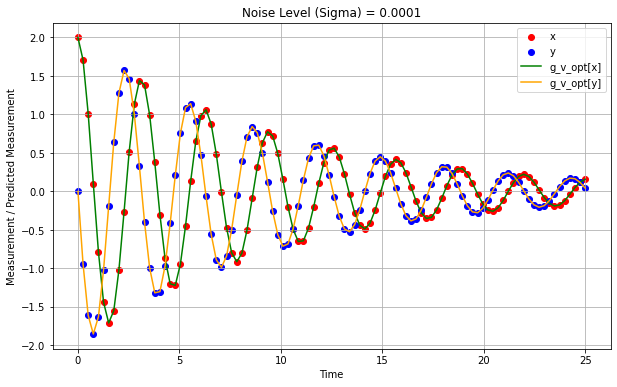

Optimal parameters: [[-0.10012983  2.00065469]
 [-1.99935795 -0.09986825]]
the number of itteration is: k= 1


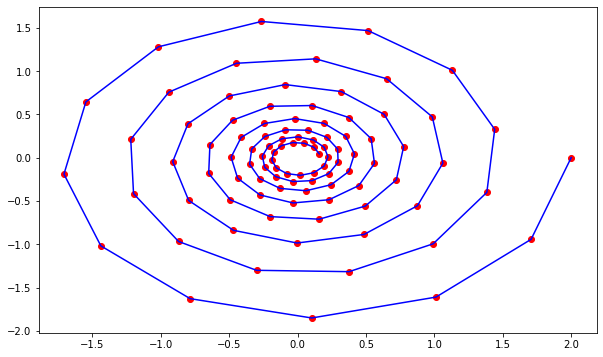

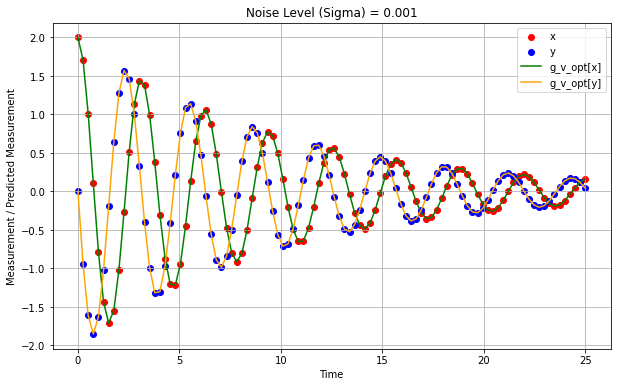

Optimal parameters: [[-0.10098279  1.99758185]
 [-2.00204948 -0.0992714 ]]
the number of itteration is: k= 2


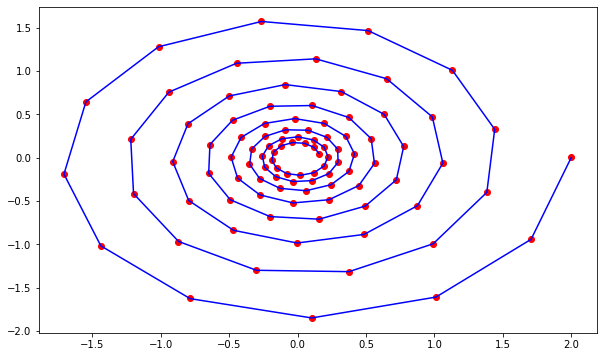

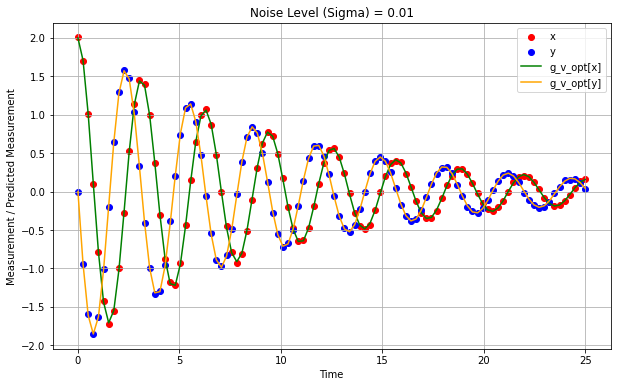

Optimal parameters: [[-0.08042757  2.04755372]
 [-1.95230339 -0.12091507]]
the number of itteration is: k= 4


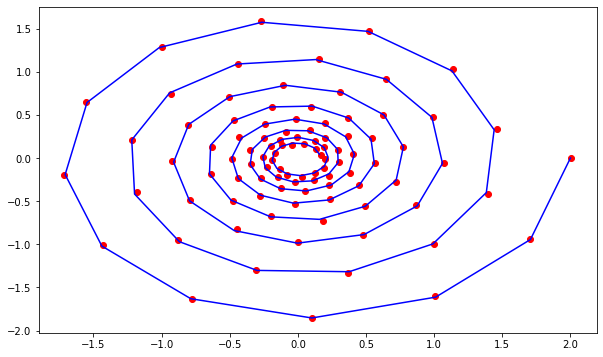

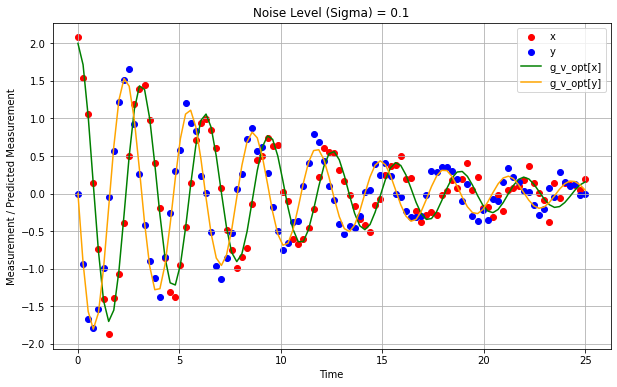

Optimal parameters: [[-0.24249105  3.18639605]
 [-1.25332781  0.09775899]]
the number of itteration is: k= 28


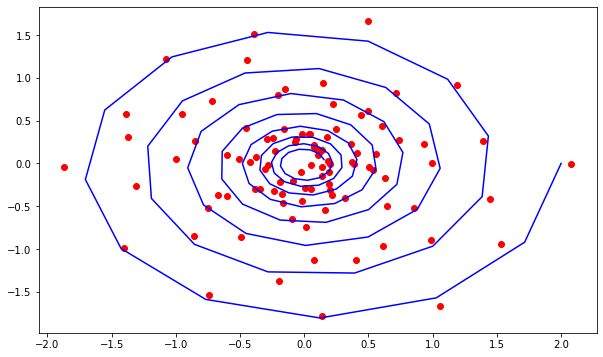

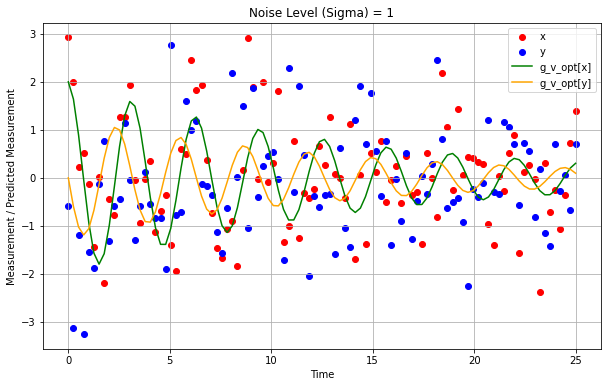

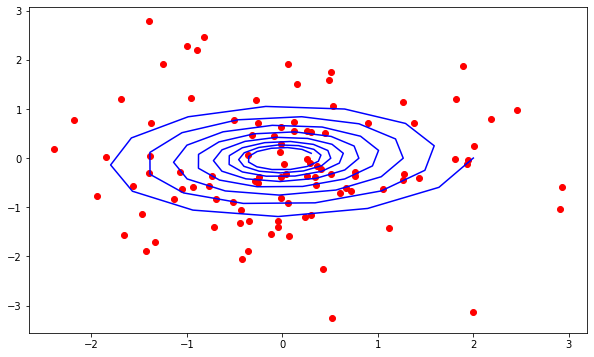

In [21]:
for sigma in sigmas:
    d = np.random.normal(0, sigma,2*t.shape[0]).reshape(-1,1)
    N =  g(A_init, t, X_o) + d
    results= Gauss_Newton(a_o,b_o,c_o,d_o, eps, t, N, k_max,X_o)
    # optimal parameters
    A_op=results[0]
    #number of itteration 
    k=results[1]
    print("Optimal parameters:",A_op) 
    print("the number of itteration is: k=",k)
    ## Generate the predicted measurements using the optimized parameters
    g_v_opt = g(A_op, t, X_o)
    # Plotting t against [0:L] and t against N[L:2*L], and also g_v[0:L] and g_v[L:2*L]in the same plot
    plt.figure(figsize=(10, 6))
    plt.scatter(t, N[::2], color='red', label='x')
    plt.scatter(t, N[1::2], color='blue', label='y')
    plt.plot(t, g_v_opt[::2], color='green', label='g_v_opt[x]')
    plt.plot(t, g_v_opt[1::2], color='orange', label='g_v_opt[y]')
    plt.xlabel('Time')
    plt.ylabel('Measurement / Predicted Measurement')
    #plt.title('Noise Level (Sigma) = {}'.format(sigma))
    plt.title('Noise Level (Sigma) = {}'.format(sigma))
    plt.legend()
    plt.grid(True)
    plt.show()
    #plt.savefig('figure.png')
    plt.figure(figsize=(10,6))
    plt.scatter( N[::2],N[1::2] , color='red', label='measurement')
    plt.plot(g_v_opt[::2],g_v_opt[1::2], color='blue',label='predictions' )

## Conclusion
The Gaussian-Newton algorithm is a powerful tool for parameter optimization in dynamical systems. By iteratively updating the parameters based on the difference between the predicted and observed measurements, the algorithm can find the optimal set of parameters that best fit the data. In this project, we explored the implementation of the Gaussian-Newton algorithm in Python and discussed its key concepts. By understanding and applying this algorithm, you can optimize the parameters of your own dynamical systems and improve their performance.

